# LAB 03:  BQML Feature Engineered Prediction Model 

**Learning Objectives**

* Create a predictive model
* Evalute model performance
* Examine the role of feature engineering on the ML problem:  Create an RMSE Summary table
* Optional:  Plot the RMSE summary table
* Optional:  Challenge exercise


## Introduction 
In this notebook, we create prediction models, evaluate model performance, and examine the role of feature engineering on the ML problem.

Each learning objective will correspond to a __#TODO__ in this student lab notebook -- try to complete this notebook first and then review the [solution notebook](../solution/feateng-solution_bqml.ipynb). **NOTE TO SELF**:  UPDATE HYPERLINK. 

### Predictive Model


Now that you have evaluated your model, the next step is to use it to predict an outcome. You use your model to predict the taxifare amount. 
The ML.PREDICT function is used to predict results using your model: feat_eng.final_model.  

Since this is a regression model (predicting a continuous numerical value), the best way to see how it performed is to evaluate the difference between the value predicted by the model and the benchmark score. We can do this with an ML.PREDICT query.

#### Exercise:  Modify **THIS INCORRECT SQL STRATEMENT** before running the query.

In [ ]:
%%bigquery
#TODO
#Objective: Create a predictive model
SELECT * FROM ML.EVALUATE(MODEL feat_eng.benchmark_model, (
    -73.982683 AS pickuplon,
    40.742104 AS pickuplat,
    -73.983766 AS dropofflon,
    40.755174 AS dropofflat,
    3.0 AS passengers,
    TIMESTAMP('2019-06-03 04:21:29.769443 UTC) AS pickup_datetime
))

In [9]:
%%bigquery
#SOLUTION
# This is the prediction query FOR heading 1.3 miles uptown in New York City on 2019-06-03 at 04:21:29.769443 UTC time with 3 passengers.
SELECT * FROM ML.PREDICT(MODEL feat_eng.final_model, (
  SELECT 
    -73.982683 AS pickuplon,
    40.742104 AS pickuplat,
    -73.983766 AS dropofflon,
    40.755174 AS dropofflat,
    3.0 AS passengers,
    TIMESTAMP('2019-06-03 04:21:29.769443 UTC') AS pickup_datetime
))

,predicted_fare_amount,pickuplon,pickuplat,dropofflon,dropofflat,passengers,pickup_datetime
0,6.081999,-73.982683,40.742104,-73.983766,40.755174,3.0,2019-06-03 04:21:29.769443+00:00


#### Exercise:  Remove passengers from the prediction model.

In [29]:
#TODO 
#Objective:  Create a predictive model

In [10]:
%%bigquery
#SOLUTION - remove passengers

SELECT * FROM ML.PREDICT(MODEL feat_eng.final_model, (
  SELECT 
    -73.982683 AS pickuplon,
    40.742104 AS pickuplat,
    -73.983766 AS dropofflon,
    40.755174 AS dropofflat,
    TIMESTAMP('2019-06-03 04:21:29.769443 UTC') AS pickup_datetime
))

,predicted_fare_amount,pickuplon,pickuplat,dropofflon,dropofflat,pickup_datetime
0,6.081999,-73.982683,40.742104,-73.983766,40.755174,2019-06-03 04:21:29.769443+00:00


#### What can you conclude when the feature passengers is removed from the prediction model?

In [ ]:
#TODO: Type answer here.

ANSWER:  Number of passengers at this pickup_datetime and location does not affect fare.

### Lab Summary: 
Our ML problem:  Develop a model to predict taxi fare based on distance -- from one point to another in New York City. 
Using feature engineering, we were able to predict a taxi fare of $6.08 in New York City, with an R2 score of .75, and an RMSE of 4.653 based upon the distance travelled.

#### OPTIONAL Exercise: Create a RMSE summary table.

###Markdown table generator:  http://www.tablesgenerator.com/markdown_tables
Create a RMSE summary table:

In [ ]:
#OPTIONAL TO DO: YOUR CODE HERE
#Hint - use the Markdown table generator in the above table to create the summary table.

| Model           | RMSE  | Description                                                                     |
|-----------------|-------|---------------------------------------------------------------------------------|
| benchmark_model | 8.29  | --Benchmark model - no feature engineering                                      |
| model_1         | 9.431 | --EXTRACT DayOfWeek from the pickup_datetime feature                            |
| model_2         | 8.408 | --EXTRACT hourofday from the pickup_datetime feature                            |
| model_3         | 8.328  | --Feature cross dayofweek and hourofday -Feature Cross does lead ot overfitting |
| model_4         | 9.657 | --Apply the ML.FEATURE_CROSS clause to categorical features                     |
| model_5         | 5.588 | --Feature cross coordinate features to create a Euclidean feature               |
| model_6         | 5.906 | --Feature cross  pick-up and drop-off locations features                        |
| model_7         | 5.75  | --Apply the BUCKETIZE function                                                  |
| final_model     | 4.653 | --Apply the TRANSFORM clause and L2 Regularization                              |

#### OPTIONAL Excercise:  Visualization - Plot a bar chart.

In [ ]:
#OPTIONAL TO DO: YOUR CODE HERE
#Objective:  Visualization - Plot a bar chart.

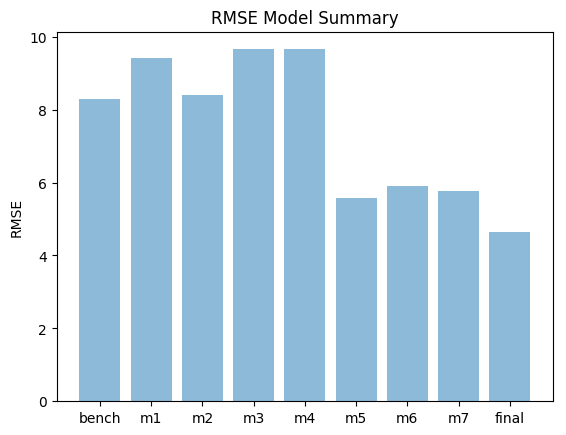

In [11]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

models = ('bench','m1', 'm2', 'm3', 'm4', 'm5', 'm6','m7', 'final')
y_pos = np.arange(len(models))
rmse = [8.29,9.431,8.408,9.657,9.657,5.588,5.906,5.759,4.653]

plt.bar(y_pos, rmse, align='center', alpha=0.5)
plt.xticks(y_pos, models)
plt.ylabel('RMSE')
plt.title('RMSE Model Summary')

plt.show()

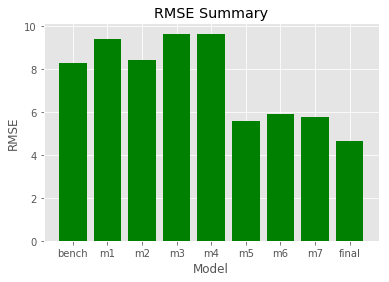

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

x = ['bench','m1', 'm2', 'm3', 'm4', 'm5', 'm6','m7', 'final']
RMSE = [8.29,9.431,8.408,9.657,9.657,5.588,5.906,5.759,4.653]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, RMSE, color='green')
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.title("RMSE Model Summary")

plt.xticks(x_pos, x)

plt.show()

# CHALLENGE MODEL IS OPTIONAL
### Create a model that modifies the dayofweek.  NOTE: I need to add more instructions here if we decide to use this (Gwendolyn)

In [17]:
%%bigquery
CREATE OR REPLACE MODEL feat_eng.challenge_model
TRANSFORM(fare_amount, 
    #SQRT( (pickuplon-dropofflon)*(pickuplon-dropofflon) + (pickuplat-dropofflat)*(pickuplat-dropofflat) ) AS euclidean, 
    #NOTE TO SELF AND PUT IN GEOLOCATION FEATURES
    ST_Distance(ST_GeogPoint(pickuplon, pickuplat), ST_GeogPoint(dropofflon, dropofflat)) AS euclidean,
          IF(EXTRACT(dayofweek FROM pickup_datetime) BETWEEN 2 and 6, 'weekday', 'weekend') AS dayofweek,
    ML.BUCKETIZE(EXTRACT(HOUR FROM pickup_datetime), [5, 10, 17]) AS day_hr,
             CONCAT(
     ML.BUCKETIZE(pickuplon, GENERATE_ARRAY(-78, -70, 0.01)),
     ML.BUCKETIZE(pickuplat, GENERATE_ARRAY(37, 45, 0.01)),
     ML.BUCKETIZE(dropofflon, GENERATE_ARRAY(-78, -70, 0.01)),
     ML.BUCKETIZE(dropofflat, GENERATE_ARRAY(37, 45, 0.01))
  ) AS pickup_and_dropoff
)
OPTIONS(input_label_cols=['fare_amount'], model_type='linear_reg', l2_reg=0.1) 

AS
SELECT 
*
FROM  `feat_eng.feateng_training_data`

""


#### Exercise:  Create three SQL statements to EVALUATE the challenge model.

In [18]:
%%bigquery
SELECT *, SQRT(loss) AS rmse FROM ML.TRAINING_INFO(MODEL feat_eng.challenge_model)

,training_run,iteration,loss,eval_loss,learning_rate,duration_ms,rmse
0,0,0,11.433265,22.693863,None,205132,3.381311


In [19]:
%%bigquery
SELECT * FROM ML.EVALUATE(MODEL feat_eng.challenge_model)

,mean_absolute_error,mean_squared_error,mean_squared_log_error,median_absolute_error,r2_score,explained_variance
0,2.329029,22.693863,0.070851,1.415602,0.745014,0.745014


In [20]:
%%bigquery
SELECT SQRT(mean_squared_error) AS rmse FROM ML.EVALUATE(MODEL feat_eng.challenge_model)

,rmse
0,4.763808


In [16]:
%%bigquery
#PREDICTION on the CHALLENGE MODEL
#In this model, we do not show a pickup time because the bucketize has put pickup time in three buckets:
#5,10,17
#How do we not show pickup datetime?

SELECT * FROM ML.PREDICT(MODEL feat_eng.challenge_model, (
  SELECT 
    -73.982683 AS pickuplon,
    40.742104 AS pickuplat,
    -73.983766 AS dropofflon,
    40.755174 AS dropofflat,
    TIMESTAMP('2019-06-03 04:21:29.769443 UTC') AS pickup_datetime
))

,predicted_fare_amount,pickuplon,pickuplat,dropofflon,dropofflat,pickup_datetime
0,6.367442,-73.982683,40.742104,-73.983766,40.755174,2019-06-03 04:21:29.769443+00:00
